# 영문 분석 -> 워드 클라우드로 그리기(시각화)

## 샘플 데이터 영문 학술 문서의 제목만 추출, 그 단어의 빈도 분석 시각화 
## 데이터 수집 : Big data 키워드로 검색 후, 해당 학술 연구 정보 서비스에서 수집 해보기. 
## 조합, pandas.concat(), 정제 re 정규식, 기본적인 유효성 체크. 
## 변환 : word_tokenize(), lower(), 
## matplotlib.pyplot 이용하기. 
## 단어 빈도 구해주는 Counter() 이용. 

## 비정형 빅데이터 분석을 말하고 -> 자연어 처리 (nature language processing )
## 자연어 처리 예) 음성, 텍스트 정보 추출. 

## 단어 빈도를 추출해서, 해당 단어 시각화하기.

# 관련 단어 용어 정리 
## 텍스트 분석: 자연어 처리와 데이터 마이닝 결합하여 발전되었고, 
## 비정형 텍스트 데이터에서 정보를 추출하는 분석 방법. 
## 분석 방법 : 1) 텍스트 분류 2) 텍스트 군집화 3) 감성 분석. 

## 전처리 : 분석 작업의 정확도를 높이기 위해서 사용할 데이터 정리하고 변환하는 작업. 
### 수행하는 작업 
### 정제 (cleaning): 불필요한 기호, 문자 필터하는 작업, 정규식을 이용해서 작업을 함. 
### 정규화 ( normallization) : 형태가 다른 단어를 특정의 형태로 변환 작업 , 대문자, 소문자 통합 하는 작업, 의미가 비슷한 단어끼리 통합작업. 
### 토큰화 (tokenization) : 토큰으로 정하는 기본 단위로 분리 작업. 문장 기준, 단어 기준이 될수 도 있다. 
### 불용어제거(stopword) : 의미 있는 단어를 추출하기 위해서, 조사, 관사, 접미사, 접두사 등. 제거하는 작업. 
### 어간 추출(semming) : 단수, 복수, 진행형(시제), 분리하는 작업 
### 표제어 추출(lemmatization ): 단어의 기본형 형태로 일반화 하는 작업. 
### 예) 
### Gone -> go 
### am -> be
### going -> go 

## 워드클라우드 : 텍스트 분석에서 빈도를 시각화 할 때 많이 사용됨. 



# 데이터 수집 
# 한국교육학술정보원 (KERIS)의 RISS 사이트 
# https://www.riss.kr/index.do
# Big data 검색해보기.
# 한 페이지당 100개씩 내보내기 엑셀 파일 간략 정보 , 반복 10번 
# 1000개의 데이터에서 제목만 추출 및 분류 작업하기. 




# 데이터 준비 작업. 
# 제목 컬럼 빈도 분석 해보기. 


In [7]:
!pip install wordcloud

In [8]:
!pip install nltk


In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# 관련 패키지들 임포트 하기. 
import pandas as pd 
# 경로 이름 지정해서 파일 처리할 때 사용하는 도구
import glob 
# 정규 표현식에 사용하는 도구 
import re 
# 2차원 리스트를 -> 1차원 리스트로 차원 축소시 사용하는 도구 
from functools import reduce
# 자연어 처리 패키지 중에서, 단어 토큰화 작업.
from nltk.tokenize import word_tokenize
# 불용어 처리 작업. 
from nltk.corpus import stopwords 
# 표제어 추출 
from nltk.stem import WordNetLemmatizer 
# 단어의 빈도를 추출하는 도구. 
from collections import Counter 
import matplotlib.pyplot as plt
# 단어의 빈도수를 시각화하는 도구, 빈도가 높을수록 글자 크기가 커짐. 
from wordcloud import STOPWORDS, WordCloud 


In [5]:
# 데이터 조합(병합)하기. 
# 현재 폴더 내부에 있는 , 받았던 엑셀 파일명 10개를 선택하기. 
# all_files = glob.glob("./myCabinetExcelData*.xls")
all_files = glob.glob("./exportExcelData_*.xls")
all_files

# 엑셀 파일 읽어서 -> 데이터 프레임 (표형태) 변환 ->특정 리스트에 담아두기 
# 임시로 저장할 리스트 변수 
all_files_data = []

# all_files 에 담겨진 엑셀 파일의 위치가 들어있고, 
# 해당 위치의 엑셀 파일을 읽어서, 데이터 프레임 표 형태로 변환하기. 
# 임시 리스트에 담기. 
for file in all_files:
  # 해당 엑셀 파일의 위치의 물리 파일 읽기
  data_frame = pd.read_excel(file)
  # 임시 리스트에 담기. 
  all_files_data.append(data_frame)

# 샘플 확인 해보기., 첫번째 요소 확인 해보기. 
# all_files_data = [엑셀1,엑셀2,엑셀3,...엑셀10]
all_files_data[0]

# 오류 발생, 모듈 미설치 : xlrd
# cmd -> pip install xlrd 

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,<bold>D</bold>ense <bold>o</bold>r <bold>S</bo...,"Choi, Unho",unknown,2022
2,NaN,3,A Game Theoretic Approach for Addressing Domai...,"Raghavan, Krishnan",unknown,2022
3,NaN,4,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
4,NaN,5,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
...,...,...,...,...,...,...
95,NaN,96,Big data analysis of swimming pools' impact on...,"Elnakat, Afamia; Gomez, Juan D.; Roberts, Jaso...",Inderscience,2015
96,NaN,97,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
97,NaN,98,Sharing Medical Big Data While Preserving Pati...,"SCHRöDER, M.;MULLER, S. H. A.;VRADI, E.;MIELKE...",Mary Ann Liebert,2023
98,NaN,99,Learning from Failure: Big Data Analysis for D...,"CAVICCHIOLI, M.KOCOLLARI, U.",Mary Ann Liebert,2021


In [6]:
# 엑셀 파일 10개를 병합해서 출력해보기. 
# axis=0 , 세로 방향으로 , 밑으로 데이터를 붙이는 작업. 
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
print(f"all_files_data_concat.shape : {all_files_data_concat.shape}")

# 병합된 파일을 csv 파일로 변환하기. 
all_files_data_concat.to_csv("./riss_Bigdata_2025.csv", encoding="utf-8", index=False)


all_files_data_concat.shape : (1000, 6)


In [7]:
# 전처리 작업 하기. 
# 데이터 프레임에서 제목 열만 추출 
all_title = all_files_data_concat["제목"]
all_title

#불용어 제거 
# set(), 기본적으로 중복 제거

# NLTK(Natural Language Toolkit) 라이브러리의 stopwords 모듈에서
# 영어에 해당하는 불용어 리스트를 가져옵니다.
# 불용어는 "the", "is", "in" 등처럼 분석에 크게 기여하지 않는, 자주 등장하는 단어들을 의미합니다.
stopWords = set(stopwords.words("english"))

# lemma 작업 -> 표제어 추출, 영어, 시제를 제거하고, 원형(사전식 단어 추출)
lemma = WordNetLemmatizer()

In [8]:
# 임시로 담을 변수, 
words = []

# 기본적인 , 단어 추출(전처리 작업.)
for title in all_title:
  # 영문자, 대 소문자를 제외한 나머지 문자는 모두 공백으로 처리하겠다. 
  print(f"과정1 title 원본: {title}")
  enWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
  print(f"과정2 title enWords(re: 대소문자남기기): {enWords}")
  # 남은 영문자를 -> 모두 소문자 변환하고 -> 각단어를 토큰으로 각각 분리 작업. 
  enWordsToken = word_tokenize(enWords.lower())
  print(f"과정3 title enWordsToken(모두 소문자 -> 각각 분리 토큰화): {enWordsToken}")
  # 컴프리헨션 파이썬 스타일 코드로 , 리스로 변경하기. 
  
  # 불용어 제거 작업, 조사, 관사 등 제거하는 작업. -> 오타:stopwords -> stopWords
  enWordsTokenStop= [w for w in enWordsToken if w not in stopWords]
  print(f"과정4 title enWordsTokenStop(불용어 제거): {enWordsTokenStop}")

  # 표제어 추출 작업. 
  enWordsTokenStopLemma = [lemma.lemmatize(w) for w in enWordsTokenStop]
  print(f"과정5 title enWordsTokenStopLemma(표제어 추출 작업 후): {enWordsTokenStopLemma}")

  words.append(enWordsTokenStopLemma)
  
print(f"words(전처리, re 정규식, token화, stop 불용어 제거, 표제어 추출) : {words}")

과정1 title 원본: Architecting Time-Critical Big-Data Systems
과정2 title enWords(re: 대소문자남기기): Architecting Time Critical Big Data Systems
과정3 title enWordsToken(모두 소문자 -> 각각 분리 토큰화): ['architecting', 'time', 'critical', 'big', 'data', 'systems']
과정4 title enWordsTokenStop(불용어 제거): ['architecting', 'time', 'critical', 'big', 'data', 'systems']
과정5 title enWordsTokenStopLemma(표제어 추출 작업 후): ['architecting', 'time', 'critical', 'big', 'data', 'system']
과정1 title 원본: <bold>D</bold>ense <bold>o</bold>r <bold>S</bold>parse : Elastic SPMM Implementation for Optimal Big-Data Processing
과정2 title enWords(re: 대소문자남기기):  bold D bold ense bold o bold r bold S bold parse Elastic SPMM Implementation for Optimal Big Data Processing
과정3 title enWordsToken(모두 소문자 -> 각각 분리 토큰화): ['bold', 'd', 'bold', 'ense', 'bold', 'o', 'bold', 'r', 'bold', 's', 'bold', 'parse', 'elastic', 'spmm', 'implementation', 'for', 'optimal', 'big', 'data', 'processing']
과정4 title enWordsTokenStop(불용어 제거): ['bold', 'bold', 'ense', 'b

In [9]:
# 2차원 리스트 -> 1차원 리스트 , 차원 축소 
# reduce 함수 이용하기. 차원 축소 
# list 함수 이용해서, 1차원 리스트로 만들기. 
result = reduce(lambda x,y : x+y, words)
words2 = list(result)
#result
print(f"result 타입 조사 : {type(words2)}")
print(f"words2 : {words2}")


result 타입 조사 : <class 'list'>
words2 : ['architecting', 'time', 'critical', 'big', 'data', 'system', 'bold', 'bold', 'ense', 'bold', 'bold', 'r', 'bold', 'bold', 'parse', 'elastic', 'spmm', 'implementation', 'optimal', 'big', 'data', 'processing', 'game', 'theoretic', 'approach', 'addressing', 'domain', 'shift', 'big', 'data', 'trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'big', 'data', 'small', 'persona', 'algorithm', 'shape', 'demographic', 'representation', 'data', 'driven', 'user', 'segment', 'big', 'scholarly', 'data', 'survey', 'data', 'efficient', 'performance', 'modeling', 'configurable', 'big', 'data', 'framework', 'reducing', 'information', 'overlap', 'training', 'example', 'comment', 'revolution', 'transform', 'live', 'work', 'think', 'interview', 'author', 'big', 'data', 'pred

In [11]:
# 데이터 탐색, 기본 분석 모델 만들기. 
# Counter -> 해당 단어 빈도 집계 해주는 함수. 
count = Counter(words2)
count

Counter({'data': 1226,
         'big': 1103,
         'analytics': 133,
         'based': 117,
         'analysis': 113,
         'system': 68,
         'driven': 68,
         'using': 68,
         'approach': 66,
         'learning': 56,
         'model': 55,
         'issue': 53,
         'application': 46,
         'special': 42,
         'management': 41,
         'algorithm': 40,
         'framework': 39,
         'call': 36,
         'science': 36,
         'platform': 36,
         'paper': 35,
         'challenge': 34,
         'network': 34,
         'new': 33,
         'cloud': 33,
         'performance': 30,
         'era': 30,
         'health': 30,
         'machine': 30,
         'research': 29,
         'review': 29,
         'mining': 29,
         'processing': 28,
         'earth': 28,
         'computing': 26,
         'real': 26,
         'perspective': 25,
         'optimization': 25,
         'world': 25,
         'method': 24,
         'study': 24,
         'techno

In [12]:
# 임시 딕션너리 만들기. 
word_count = dict()

# 상위 50개 정도만 추출 해보기. 
for tag, counts in count.most_common(50):
  if(len(str(tag)) >1):
    word_count[tag] = counts
    print(f"tag : {tag}, counts : {counts}")

word_count

tag : data, counts : 1226
tag : big, counts : 1103
tag : analytics, counts : 133
tag : based, counts : 117
tag : analysis, counts : 113
tag : system, counts : 68
tag : driven, counts : 68
tag : using, counts : 68
tag : approach, counts : 66
tag : learning, counts : 56
tag : model, counts : 55
tag : issue, counts : 53
tag : application, counts : 46
tag : special, counts : 42
tag : management, counts : 41
tag : algorithm, counts : 40
tag : framework, counts : 39
tag : call, counts : 36
tag : science, counts : 36
tag : platform, counts : 36
tag : paper, counts : 35
tag : challenge, counts : 34
tag : network, counts : 34
tag : new, counts : 33
tag : cloud, counts : 33
tag : performance, counts : 30
tag : era, counts : 30
tag : health, counts : 30
tag : machine, counts : 30
tag : research, counts : 29
tag : review, counts : 29
tag : mining, counts : 29
tag : processing, counts : 28
tag : earth, counts : 28
tag : computing, counts : 26
tag : real, counts : 26
tag : perspective, counts : 25
t

{'data': 1226,
 'big': 1103,
 'analytics': 133,
 'based': 117,
 'analysis': 113,
 'system': 68,
 'driven': 68,
 'using': 68,
 'approach': 66,
 'learning': 56,
 'model': 55,
 'issue': 53,
 'application': 46,
 'special': 42,
 'management': 41,
 'algorithm': 40,
 'framework': 39,
 'call': 36,
 'science': 36,
 'platform': 36,
 'paper': 35,
 'challenge': 34,
 'network': 34,
 'new': 33,
 'cloud': 33,
 'performance': 30,
 'era': 30,
 'health': 30,
 'machine': 30,
 'research': 29,
 'review': 29,
 'mining': 29,
 'processing': 28,
 'earth': 28,
 'computing': 26,
 'real': 26,
 'perspective': 25,
 'optimization': 25,
 'world': 25,
 'method': 24,
 'study': 24,
 'technology': 24,
 'business': 24,
 'service': 24,
 'opportunity': 23,
 'distributed': 23,
 'survey': 22,
 'efficient': 22,
 'use': 21,
 'medical': 21}

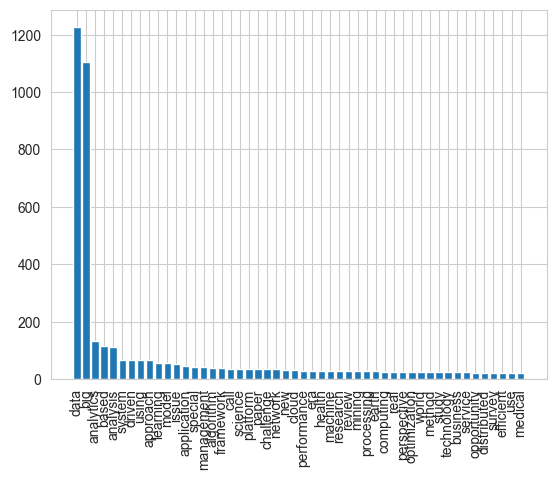

In [13]:
# 추출된 상위 50개 단어 시각화하기. 
# 막대그래프 
# word_count : 상위 50개 단어 추출한 , 딕션너리 = Map 비슷 ,key : value 
# 기본이 : 오름 차순, reverse, 내림 차순이라고 보면 됨. 
sorted_Keys = sorted(word_count, key = word_count.get, reverse=True)

# values 추출, 내림 차순 
sorted_Values= sorted(word_count.values(), reverse=True)

# 시각화 
# x축 : range(len(word_count))
# Y축 : sorted_Values
plt.bar(range(len(word_count)),sorted_Values, align='center')
# 눈금 옵션 조정. x축 라벨 붙이기 작업. rotation 세로 방향으로 기울이기. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()



In [14]:

# 기존 데이터 프레임에 새로운 컬럼(doc_count) 추가, 임의로 0으로 값 넣기. 
all_files_data_concat["doc_count"] = 0

#  출판일 기준으로 그룹화해서, count 집계 표기 하기.
# as_index=False 옵션을 사용하면 그룹화된 결과의 "출판일"이 인덱스가 아닌 일반 열로 유지됩니다.
summary_date = all_files_data_concat.groupby("출판일", as_index=False)["doc_count"].count()
summary_date

,출판일,doc_count
0,2003,1
1,2011,2
2,2012,12
3,2013,41
4,2014,82
5,2015,69
6,2016,75
7,2017,94
8,2018,88
9,2019,64


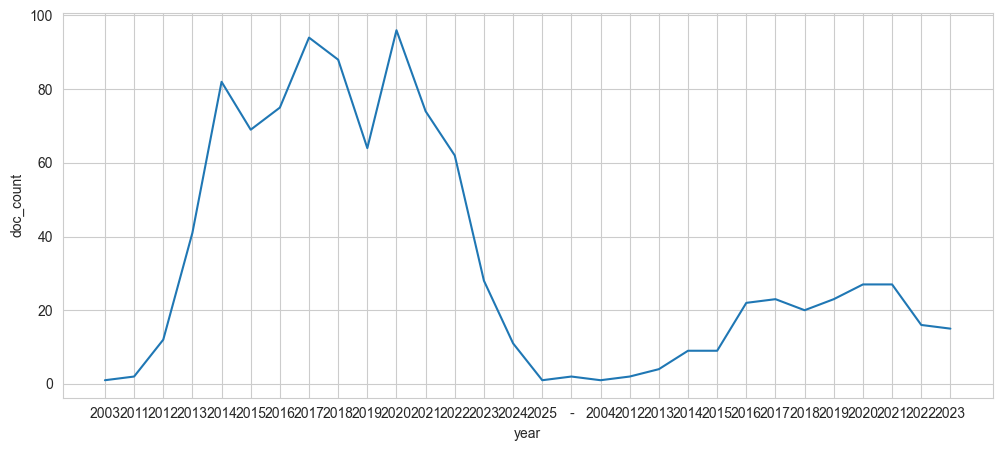

In [15]:
# 꺽은선 그래프 
# 가로 세로 비율
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc_count")
plt.grid(True)
# x축 : range(len(summary_date))
# y축 : summary_date["doc_count"]
plt.plot(range(len(summary_date)), summary_date["doc_count"] )
# x축 라벨링 옵션 
plt.xticks(range(len(summary_date)), [text for text in summary_date["출판일"]])
plt.show()

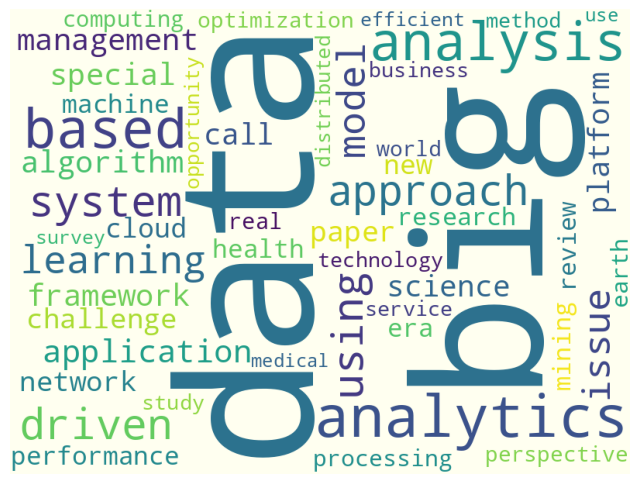

In [16]:
# 워드 클라우드 공식 문서 , 다양한 이미지 위에 처리하기. 
# https://amueller.github.io/word_cloud/index.html

# 워드 클라우드 시각화
# STOPWORDS는 WordCloud 라이브러리에서 제공하는 기본 불용어 집합입니다.
# 이 코드는 STOPWORDS를 집합(set)으로 변환하여,
# 워드 클라우드 생성 시 불필요한 단어(예: "the", "and" 등)를 제거하는 데 사용합니다.
stopwords = set(STOPWORDS)

# stopwords=stopwords:
# 위에서 정의한 불용어 집합을 사용하여, 워드 클라우드에 포함하지 않을 단어들을 지정합니다.
wc = WordCloud(background_color="ivory", stopwords=stopwords, width=800, height=600)
# word_count는 단어와 해당 단어의 빈도수를 담은 사전(dictionary)입니다.
# 이 메서드는 word_count에 저장된 단어들의 빈도 정보를 바탕으로 워드 클라우드를 생성하고, 그 결과를 cloud에 저장합니다.
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis("off")
plt.show()
# data': 1235,
#  'big': 1113,
#  'analytics': 110,
#  'based': 102,
#  'analysis': 93,
#  'driven': 70,
#  'system': 64,
#  'using': 57,
